#**read the csv file as dataframe**

In [1]:
import pandas as pd

df = pd.read_csv('/Users/wlk/Desktop/3.Semester/CSS/CSIS/nodes')
df=df['specialty;"city";"patients";"free_time";"community";"friends";"adoption_date";"proximity";"med_sch_yr";"jours";"clubs";"meetings";"id";"discuss"'].str.split(';', expand=True)

# df[6] == df[""adoption_date""]
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,9,"""Galesburg""","""9""","""9""","""9""","""9""","""99""","""9""","""9""","""9""","""9""","""9""","""246""","""9"""
1,9,"""Galesburg""","""9""","""9""","""9""","""9""","""99""","""9""","""9""","""9""","""9""","""9""","""245""","""9"""
2,9,"""Galesburg""","""9""","""9""","""9""","""9""","""99""","""9""","""9""","""9""","""9""","""9""","""244""","""9"""
3,4,"""Galesburg""","""2""","""1""","""4""","""3""","""98""","""2""","""4""","""4""","""0""","""2""","""243""","""1"""
4,4,"""Galesburg""","""9""","""1""","""5""","""3""","""98""","""2""","""4""","""5""","""0""","""1""","""242""","""2"""
5,1,"""Galesburg""","""9""","""9""","""6""","""9""","""16""","""3""","""2""","""4""","""9""","""1""","""241""","""9"""
6,4,"""Galesburg""","""3""","""1""","""6""","""1""","""98""","""3""","""3""","""9""","""1""","""2""","""240""","""1"""
7,4,"""Galesburg""","""2""","""3""","""6""","""2""","""98""","""3""","""1""","""5""","""0""","""2""","""239""","""2"""
8,4,"""Galesburg""","""3""","""1""","""4""","""3""","""98""","""3""","""2""","""6""","""0""","""2""","""238""","""1"""
9,4,"""Galesburg""","""3""","""1""","""4""","""1""","""98""","""3""","""4""","""4""","""1""","""2""","""237""","""2"""


In [2]:
num_agents = df.shape[0]
print(num_agents)

246


# **rearrange connections into clusters**

In [3]:
import csv

import numpy as np


max_node_array= [116, 166, 210, 246]
cluster_range = [[0,116],[116,166],[166,210],[210,246]]
cluster_size = [116,50,44,36]

cluster_names = ["Peoria","Bloomington" , "Quincy" ,"Galesburg"]



def get_edges_array(cluster_max):

    peoria_cluster_edges = []

    bloomington_cluster_edges = []

    quincy_cluster_edges = []

    galesburg_cluster_edges = []

    with open('/Users/wlk/Desktop/3.Semester/CSS/CSIS/medical_innovationver3.csv',newline='', encoding='utf-8') as f:

        reader = csv.reader(f)

        row_num = 0

        for row in reader:
            if row_num == 0:
                row_num+=1
            else:
                edge_properties = []
                args = row[0].split(";")

                node1 = int(args[0]) -1

                

                node2 = int(args[1][1:-1]) -1

                fr_ad_dis = [int(args[2][1:-1]), int(args[3][1:-1]), int(args[5][1:-1])]

                id = int(args[4][1:-1])

                edge_properties= [node1, node2, fr_ad_dis[0], fr_ad_dis[1], fr_ad_dis[2]]

                if (node1 <= cluster_max[0] and node2 <= cluster_max[0]):

                    

                    peoria_cluster_edges.append(edge_properties)

                elif(node1 <= cluster_max[1] and node2 <= cluster_max[1]): 

                    bloomington_cluster_edges.append(edge_properties)

                elif(node1 <= cluster_max[2] and node2 <= cluster_max[2]): 

                    quincy_cluster_edges.append(edge_properties)

                else: 

                    galesburg_cluster_edges.append(edge_properties)

    return peoria_cluster_edges, bloomington_cluster_edges, quincy_cluster_edges, galesburg_cluster_edges    



###

# edges arrays arguments: 

#   - node1 (from)

#   - node2 (to) 

#   - friendship relation 

#   - advice relation

#   - discussion relation

#  ###

peoria_edges, bloomington_edges, quincy_edges, galesburg_edges = get_edges_array(max_node_array)
edge_properties=[]
edge_properties.append(peoria_edges)
edge_properties.append(bloomington_edges)
edge_properties.append(quincy_edges)
edge_properties.append(galesburg_edges)

# **get time revolution (of opinion status of an agent) with original data**

1.   each row represents an agent
2.   each column represents the agent's opinion at this timepoint



In [4]:
ad_time_all_old = df[6]
ad_time_all=[]
for i in range(246):
  ad_time_all.append(int(ad_time_all_old[i][1:-1]))
print(ad_time_all)
ad_time_all=np.asarray(ad_time_all)

[99, 99, 99, 98, 98, 16, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 7, 98, 14, 4, 7, 14, 6, 3, 6, 13, 8, 3, 4, 8, 5, 4, 18, 18, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 2, 3, 8, 11, 13, 3, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 5, 6, 6, 7, 16, 15, 3, 18, 7, 5, 18, 4, 18, 18, 2, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 7, 18, 9, 9, 18, 1, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 7, 17, 5, 11, 2, 2, 1, 1, 5, 2, 1, 6, 7, 18, 1, 6, 7, 98, 1, 98, 99, 99, 99, 99, 99, 99, 99, 99, 99, 18, 98, 98, 7, 98, 98, 98, 98, 98, 98, 3, 4, 13, 5, 2, 1, 6, 7, 98, 99, 98, 98, 99, 98, 98, 98, 18, 4, 18, 6, 1, 7, 6, 1, 12, 12, 18, 98, 11, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 4, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 18, 14, 8, 8, 4, 14, 6, 7, 5, 15, 3, 5, 1, 6, 3, 4, 5, 7, 8, 2, 11, 5, 18, 15, 4, 15, 2, 5, 4, 2, 11, 3, 18, 10, 9, 9, 8, 12, 1]


In [5]:
time_range = ad_time_all.max()
print(time_range)

opinion_timeline_agents = []
for i in range(num_agents):
  opinion_timeline_agent_i = np.zeros(99)
  adoption_timepoint = int(ad_time_all[i])
  opinion_timeline_agent_i=[1 if j >= adoption_timepoint-1 else 0 for j in range(time_range) ] 
  opinion_timeline_agents.append(opinion_timeline_agent_i)
opinion_timeline_agents=np.asarray(opinion_timeline_agents)

print(opinion_timeline_agents)

99
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


# plot the real percentage change

cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.051724
2           2    0.094828
3           3    0.129310
4           4    0.163793
5           5    0.198276
6           6    0.250000
7           7    0.275862
8           8    0.293103
9           9    0.293103
10         10    0.310345
11         11    0.310345
12         12    0.327586
13         13    0.344828
14         14    0.353448
15         15    0.370690
16         16    0.379310
17         17    0.448276
18         18    0.448276
19         19    0.448276

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.14
2           2        0.16
3           3        0.20
4           4        0.24
5           5        0.30
6           6        0.38
7           7        0.38
8           8        0.38
9           9        0.38
10         10        0.38
11         11        0.38
12         12        0.40
13         13        0.40
14         14        0.40
15         15  

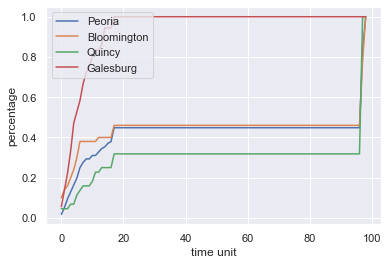

In [6]:
from sklearn.model_selection import train_test_split
import seaborn as sns

# label : percentage of opinion 1 at each timepoint

def get_change_real(cluster_index): 
    
    real_percentage_overtime = []

    for i in range(99):
        cluster_column_i = opinion_timeline_agents[cluster_range[cluster_index][0]:cluster_range[cluster_index][1],i]
        ones = np.count_nonzero(cluster_column_i)
        percent = ones / cluster_size[cluster_index]

        combined = []
        combined.append(i)
        combined.append(percent)

        real_percentage_overtime.append(combined)

    data = pd.DataFrame(real_percentage_overtime, columns = ['time unit','percentage'])  
    
    print("cluster ",cluster_index)
    print(data.head(20))
    print()
    sns.set_theme()    
    sns.lineplot(x='time unit', y='percentage', data=data,label = cluster_names[cluster_index], ci=None)
    
    return real_percentage_overtime

real_cluster_0 = get_change_real(0)
real_cluster_1 = get_change_real(1)
real_cluster_2 = get_change_real(2)
real_cluster_3 = get_change_real(3)

# plot the simulated percentage change with fixed parameters

In [83]:
from sklearn.linear_model import LinearRegression
import math
from scipy import stats


def get_initial_opinions(cluster_number): 
    initial_opinions = []

    for i in range(num_agents): 
        initial_opinions.append(opinion_timeline_agents[i][0])

    peoria_initials = initial_opinions[0:max_node_array[0]]
    bloomington_initials = initial_opinions[cluster_range[1][0]:cluster_range[1][1]]
    quincy_initials = initial_opinions[cluster_range[2][0]:cluster_range[2][1]]
    galesburg_initials = initial_opinions[cluster_range[3][0]:cluster_range[3][1]]
    opinion_initials_per_cluster = [peoria_initials, bloomington_initials, quincy_initials, galesburg_initials]

    return opinion_initials_per_cluster[cluster_number]



# # get percentage of opinion 1 at each timepoint with our model
def get_change_simulated(cluster_index, k_alpha, k_beta, k_gamma, E_profit):
    edge_props = edge_properties[cluster_index]
    
    simulated_percentage_overtime = []
    
    # initial state
    #initial_state_all = [0,opinion_timeline_agents[:,0]]
    #initial_state_this_cluster = initial_state_all[cluster_range[i][0]:cluster_range[i][1]]
    
    #simulated_percentage_overtime.append(initial_state_this_cluster)
    initial_state_this_cluster = get_initial_opinions(cluster_index)
    current_state = [0, initial_state_this_cluster ]
    simulated_percentage_overtime.append([0, np.count_nonzero(initial_state_this_cluster)/cluster_size[cluster_index]])
    
    # calculate driving force(cluster specific)
    driving_force = update_driving_forces_cluster_specific(edge_props, cluster_index, current_state[1])
    
    # later states
    for i in range(25):
        new_opinions, driving_force = update(driving_force, edge_props, cluster_index, current_state[1])
        current_state = [i+1, new_opinions ]
        simulated_percentage_overtime.append([i+1, np.count_nonzero(new_opinions)/cluster_size[cluster_index]])
        
        
    # plotting
    simulation= pd.DataFrame(simulated_percentage_overtime, columns = ['time unit','percentage'])  
    
    print("cluster ",cluster_index)
    print(simulation.head(25))
    print()
    sns.set_theme()    
    sns.lineplot(x='time unit', y='percentage', data=simulation, label =cluster_names[cluster_index],ci=None)
    

def update_driving_forces_cluster_specific(edge_props, cluster_number, opinions): 
    len_cluster = 0
    first_node = 0
    if cluster_number == 0: 
        len_cluster = max_node_array[0]
    else: 
        len_cluster = max_node_array[cluster_number]-max_node_array[cluster_number-1]
        first_node = max_node_array[cluster_number-1]
    
    updated_driving_force = np.zeros(len_cluster)

    agents_ids = [first_node+i for i in range(len_cluster)]

    for a in agents_ids:
        for edge in edge_props: 
           #check that the edge is directed at node a and opinions of agents don't match
           if edge[1] == a and  not opinions[a-first_node] == opinions[edge[0]-first_node]: 
                updated_driving_force[a-first_node] += edge[2] * k_alpha + edge[3] * k_beta + edge[4]*k_gamma
        updated_driving_force[a-first_node]+=E_profit
        #print("agent {} obtained a driving force of {}".format(a, updated_driving_force[a]))

    return updated_driving_force 


def prob_of_change(driving_forces):
    driving_forces = normalise_driving_force(driving_forces, -2 ,2)
    probs = stats.norm.cdf(driving_forces)
    #probs = np.repeat(0.01, len(driving_forces))
    #probs = driving_forces/(len(driving_forces) * k_alpha + E_profit)
    #print(probs)
    return probs

def normalise_driving_force(driving_forces, a, b):
    min_val = np.amin(driving_forces)
    #max_val = np.amax(driving_forces)
    max_val = ((len(driving_forces) * (k_alpha+k_beta+k_gamma)) + E_profit)
    #return (b-a) * (driving_forces-min_val)/(max_val-min_val) - a
    return ((b-a)* driving_forces/max_val)+a

def opinion(x, p):
    res = (np.random.rand(1))[0]
    return 1-x if res < p else x
    
def opinion_no_return(x, p): 
    if(x == 1):
        return 1
    else: 
        return opinion(x,p) 


def update(driving_forces, edge_props, cluster_index, current_state):
    new_states = []
    prob = prob_of_change(driving_forces)
    for agent in range(cluster_size[cluster_index]):
        #new_state = opinion(current_state[agent], prob[agent])
        new_state_no_return = opinion_no_return(current_state[agent], prob[agent])
        #new_states.append(new_state)
        new_states.append(new_state_no_return)
    
    new_driving_force = update_driving_forces_cluster_specific(edge_props, cluster_index, current_state)
    
    return new_states, new_driving_force


# With return:

cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.034483
2           2    0.051724
3           3    0.077586
4           4    0.086207
5           5    0.094828
6           6    0.094828
7           7    0.112069
8           8    0.112069
9           9    0.120690
10         10    0.129310
11         11    0.146552
12         12    0.163793
13         13    0.172414
14         14    0.198276
15         15    0.206897
16         16    0.232759
17         17    0.241379
18         18    0.250000
19         19    0.250000
20         20    0.293103
21         21    0.267241
22         22    0.275862
23         23    0.284483
24         24    0.301724

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.12
2           2        0.12
3           3        0.22
4           4        0.24
5           5        0.26
6           6        0.28
7           7        0.28
8           8        0.30
9           9        0.28
10         10  

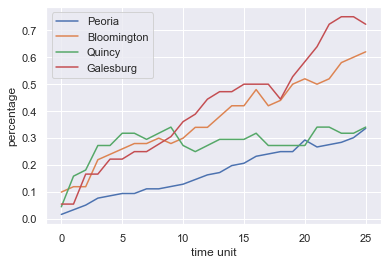

In [75]:
get_change_simulated(0,1,2,3,15)
get_change_simulated(1,1,2,3,15)
get_change_simulated(2,1,2,3,15)
get_change_simulated(3,1,2,3,15)

# no return allowed

cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.068966
2           2    0.103448
3           3    0.129310
4           4    0.137931
5           5    0.146552
6           6    0.172414
7           7    0.189655
8           8    0.206897
9           9    0.215517
10         10    0.232759
11         11    0.250000
12         12    0.284483
13         13    0.284483
14         14    0.293103
15         15    0.310345
16         16    0.318966
17         17    0.336207
18         18    0.344828
19         19    0.379310
20         20    0.413793
21         21    0.422414
22         22    0.439655
23         23    0.474138
24         24    0.474138

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.12
2           2        0.16
3           3        0.20
4           4        0.20
5           5        0.26
6           6        0.30
7           7        0.34
8           8        0.38
9           9        0.40
10         10  

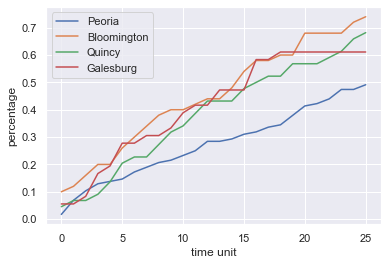

In [84]:
get_change_simulated(0,1,2,3,15)
get_change_simulated(1,1,2,3,15)
get_change_simulated(2,1,2,3,15)
get_change_simulated(3,1,2,3,15)

# **set the model**

In [85]:
import torch.nn as nn
import torch
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm
class SimpleFCNet(nn.Module):

    def __init__(self, num_layers, in_dim, out_dim, hidden_dim, use_bn=False):
        super(SimpleFCNet, self).__init__()
        self.num_layers = num_layers
        self.sigm = nn.Sigmoid()
        self.fc_in = nn.Linear(in_dim, hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, out_dim)
        self.fc_hidd = nn.Linear(hidden_dim, hidden_dim)

        # self.use_bn = use_bn
        # self.bn = nn.BatchNorm1d()

        layers = []
        for i in range(self.num_layers + 1):
            # if self.use_bn:
            #     layers.append()
            if i == 0:
                layers.append(self.fc_in)
            elif i == self.num_layers:
                layers.append(self.fc_out)
            else:
                layers.append(self.fc_hidd)
            layers.append(self.sigm)
        self.net = nn.Sequential(*layers)


    def forward(self, x):
        return self.net(x)

# x = [parameters_to_fit, driving_forces]
def train(model, x, y, timestep, all_opinion, writer=None):
    num_epochs = 50
    learning_rate = 1e-2
    optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    loss = nn.MSELoss()
    
    def opinion(x, p):
        res = (np.random.rand(1))[0]
        return 1-x if res < p else x

    def opinion_no_return(x, p): 
        if(x == 1):
            return 1
        else: 
            return opinion(x,p) 

    def get_opinion(current_opinion, res, step):
        opinions = []
        prob = res
        for agent in range(len(res)):
            new_state_no_return = opinion_no_return(current_opinion[agent], prob[agent])
            opinions.append(new_state_no_return)
        opinions = torch.tensor(opinions).float()
        opinions.requires_grad=True
        return opinions

    dfs = x[1].detach()
    params = x[0]

    res = None
    
    for i in tqdm(range(num_epochs), desc="training model ..."):
        optimizer.zero_grad()
        inp = torch.cat((params, dfs))
        inp = inp.float()
        res = model(inp)
        
        x = get_opinion(all_opinion[timestep-1], res, timestep)
        
        model_loss = loss(x, y.float()) #TODO: create a meaningful loss function
        
        
#         if writer is not None:
#             writer.add_scalar('training loss time step {}'.format(timestep), model_loss, i)
#         else:
#             print("epoch {}: loss = {}".format(i, model_loss))
        model_loss.backward()
        
        optimizer.step()
    print(params.grad)

    return params, get_opinion(all_opinion[timestep-1], res, timestep)

In [86]:
# plot function for model
def plot(all_opinions, cluster_index):
    
    
    model_percentage_overtime = []
    initial_percent = np.count_nonzero(all_opinions[0])/cluster_size[cluster_index]
    model_percentage_overtime.append([0, initial_percent])
    
    
    for i in range(len(all_opinions) - 1):
        
        opinion = all_opinions[i + 1]
        ones = np.count_nonzero(opinion.detach().numpy())
        percent = ones / cluster_size[cluster_index]

        combined = []
        combined.append(i + 1)
        combined.append(percent)

        model_percentage_overtime.append(combined)
        
    model_data = pd.DataFrame(model_percentage_overtime, columns = ['time unit','percentage'])  
    
    print("cluster ",cluster_index)
    print(model_data.head(20))
    print()
    sns.set_theme()    
    sns.lineplot(x='time unit', y='percentage', data=model_data,label = cluster_names[cluster_index], ci=None)

In [87]:
def update_driving_forces_model(opinions, driving_forces, edge_props, cluster_index, k_alpha_model,
        k_beta_model,
        k_gamma_model,E_profit_model): 
    len_cluster = 0
    first_node = 0
    if cluster_index == 0: 
        len_cluster = max_node_array[0]
    else: 
        len_cluster = max_node_array[cluster_index]-max_node_array[cluster_index-1]
        first_node = max_node_array[cluster_index-1]
    
    updated_driving_force = np.zeros(len_cluster)

    agents_ids = [first_node+i for i in range(len_cluster)]

    for a in agents_ids:
        for edge in edge_props: 
           #check that the edge is directed at node a and opinions of agents don't match
           if edge[1] == a and not opinions[a-first_node] == opinions[edge[0]-first_node]: 
                updated_driving_force[a-first_node] += edge[2] * k_alpha_model + edge[3] * k_beta_model + edge[4]*k_gamma_model
        updated_driving_force[a-first_node]+=E_profit_model
        #print("agent {} obtained a driving force of {}".format(a, updated_driving_force[a]))

    return updated_driving_force 



k_alpha_model =.1
k_beta_model = 1
k_gamma_model = 2
E_profit_model = 15

parameters_to_fit = torch.tensor(
        [k_alpha_model,
        k_beta_model,
        k_gamma_model,
        E_profit_model]
    )

parameters_to_fit = nn.Parameter(parameters_to_fit)



def run_simulation(cluster_index, parameters_to_fit):
    
    edge_props_this_cluster = edge_properties[cluster_index]
    num_agents_in_cluster = cluster_size[cluster_index]
    

    
    # initialise clusters and agents
    initial_opinion = get_initial_opinions(cluster_index)
    
    
    # initialise driving force
    driving_forces = update_driving_forces_cluster_specific(edge_props_this_cluster, cluster_index, initial_opinion)
    driving_forces = torch.tensor(driving_forces)
    
    distribution = SimpleFCNet(
    num_layers=1,
    in_dim=num_agents_in_cluster+4,
    out_dim=num_agents_in_cluster,
    hidden_dim=2*(num_agents_in_cluster)
    )
    

    all_opinions = []
    all_opinions.append(initial_opinion)
    
    for step in tqdm(range(25), desc="simulation step "):
        y = opinion_timeline_agents[cluster_range[cluster_index][0]:cluster_range[cluster_index][1],step]
        y = torch.tensor(y)
        x = [parameters_to_fit, driving_forces]
        parameters_to_fit, new_opinion = train(distribution, x, y, step, all_opinions)
        all_opinions.append(new_opinion)

        driving_forces = update_driving_forces_model(new_opinion, driving_forces, edge_props_this_cluster, cluster_index, 
                                                   parameters_to_fit[0].float(),
                                                   parameters_to_fit[1].float(),
                                                   parameters_to_fit[2].float(), 
                                                   parameters_to_fit[3].float())
        driving_forces = torch.tensor(driving_forces)
        
    #plot(all_opinions, cluster_index)

# With return:

# **train Peoria, get parameters, predicte other clusters**

training model ...: 100%|██████████| 50/50 [00:00<00:00, 653.71it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None



training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None



training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None



training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None



training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None



training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None



training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None



training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None



training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None



training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None



training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None



training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None


simulation step : 100%|██████████| 25/25 [00:03<00:00,  8.19it/s]


None
cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.043103
2           2    0.051724
3           3    0.112069
4           4    0.129310
5           5    0.120690
6           6    0.120690
7           7    0.146552
8           8    0.181034
9           9    0.215517
10         10    0.250000
11         11    0.284483
12         12    0.284483
13         13    0.293103
14         14    0.284483
15         15    0.327586
16         16    0.327586
17         17    0.353448
18         18    0.353448
19         19    0.370690
20         20    0.370690
21         21    0.379310
22         22    0.379310
23         23    0.379310
24         24    0.396552

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.10
2           2        0.12
3           3        0.12
4           4        0.16
5           5        0.18
6           6        0.16
7           7        0.16
8           8        0.22
9           9        0.24
10        

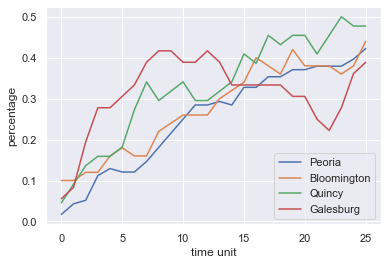

In [79]:
run_simulation(0, parameters_to_fit)
get_change_simulated(0, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(1, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(2, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(3, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])

# **train Bloomington, get parameters, predicte other clusters**

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1266.59it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1369.23it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1041.76it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1020.89it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1001.91it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 990.32it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1027.85it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 971.85it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1039.07it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 931.48it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 978.34it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 971.16it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1002.95it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


simulation step : 100%|██████████| 25/25 [00:01<00:00, 17.42it/s]


None
cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.043103
2           2    0.043103
3           3    0.077586
4           4    0.086207
5           5    0.103448
6           6    0.112069
7           7    0.137931
8           8    0.198276
9           9    0.206897
10         10    0.215517
11         11    0.206897
12         12    0.215517
13         13    0.250000
14         14    0.267241
15         15    0.267241
16         16    0.301724
17         17    0.284483
18         18    0.310345
19         19    0.362069
20         20    0.370690
21         21    0.396552
22         22    0.413793
23         23    0.396552
24         24    0.379310

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.16
2           2        0.16
3           3        0.16
4           4        0.20
5           5        0.28
6           6        0.34
7           7        0.34
8           8        0.40
9           9        0.38
10        

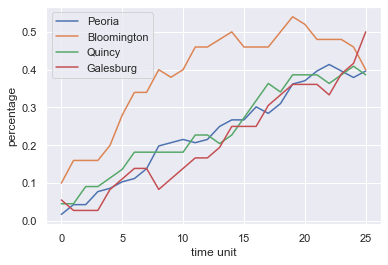

In [80]:
run_simulation(1, parameters_to_fit)
get_change_simulated(0, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(1, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(2, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(3, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])

# **train Quincy, get parameters, predicte other clusters**

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1451.77it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1476.63it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1132.50it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1131.07it/s]


None
None
None
None
None



training model ...: 100%|██████████| 50/50 [00:00<00:00, 1146.39it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1140.48it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1128.85it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1142.26it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1121.61it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1139.99it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1064.51it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1084.67it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1071.40it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1098.24it/s]

simulation step : 100%|██████████| 25/25 [00:01<00:00, 19.37it/s]


None
None
None
None
cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.068966
2           2    0.077586
3           3    0.112069
4           4    0.137931
5           5    0.155172
6           6    0.172414
7           7    0.181034
8           8    0.198276
9           9    0.232759
10         10    0.250000
11         11    0.267241
12         12    0.250000
13         13    0.267241
14         14    0.284483
15         15    0.310345
16         16    0.318966
17         17    0.362069
18         18    0.370690
19         19    0.413793
20         20    0.405172
21         21    0.422414
22         22    0.396552
23         23    0.405172
24         24    0.387931

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.12
2           2        0.16
3           3        0.18
4           4        0.20
5           5        0.20
6           6        0.22
7           7        0.24
8           8        0.22
9           9        

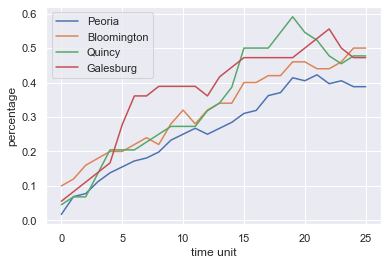

In [81]:
run_simulation(2, parameters_to_fit)
get_change_simulated(0, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(1, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(2, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(3, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])

# **train Galesburg, get parameters, predicte other clusters**

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1693.19it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1644.09it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1287.28it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1342.43it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1270.23it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1298.29it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1315.37it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1302.43it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1298.54it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1295.50it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1254.14it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1257.65it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1291.72it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1320.28it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None


training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1258.21it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1322.99it/s]

simulation step : 100%|██████████| 25/25 [00:01<00:00, 22.11it/s]


None
None
None
None
cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.034483
2           2    0.051724
3           3    0.077586
4           4    0.086207
5           5    0.103448
6           6    0.112069
7           7    0.146552
8           8    0.163793
9           9    0.198276
10         10    0.215517
11         11    0.250000
12         12    0.258621
13         13    0.250000
14         14    0.301724
15         15    0.293103
16         16    0.327586
17         17    0.344828
18         18    0.353448
19         19    0.362069
20         20    0.379310
21         21    0.396552
22         22    0.405172
23         23    0.405172
24         24    0.422414

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.14
2           2        0.14
3           3        0.12
4           4        0.16
5           5        0.22
6           6        0.24
7           7        0.24
8           8        0.28
9           9        

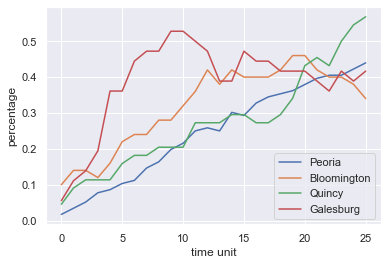

In [82]:
run_simulation(3, parameters_to_fit)
get_change_simulated(0, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(1, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(2, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(3, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])

# no return allowed:

# **train Peoria, get parameters, predicte other clusters**

training model ...: 100%|██████████| 50/50 [00:00<00:00, 698.50it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 557.36it/s]


None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 650.03it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 729.88it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 789.20it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 797.75it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 801.85it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 839.20it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 793.03it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 800.42it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 832.14it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 824.36it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None


simulation step : 100%|██████████| 25/25 [00:02<00:00, 12.48it/s]


None
cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.034483
2           2    0.051724
3           3    0.077586
4           4    0.112069
5           5    0.137931
6           6    0.172414
7           7    0.206897
8           8    0.224138
9           9    0.241379
10         10    0.258621
11         11    0.275862
12         12    0.327586
13         13    0.353448
14         14    0.387931
15         15    0.387931
16         16    0.387931
17         17    0.405172
18         18    0.413793
19         19    0.439655
20         20    0.465517
21         21    0.491379
22         22    0.543103
23         23    0.560345
24         24    0.568966

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.18
2           2        0.22
3           3        0.22
4           4        0.28
5           5        0.32
6           6        0.34
7           7        0.36
8           8        0.36
9           9        0.36
10        

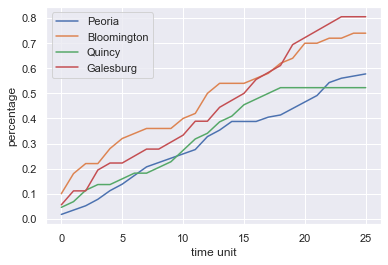

In [88]:
run_simulation(0, parameters_to_fit)
get_change_simulated(0, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(1, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(2, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(3, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])

# **train Bloomington, get parameters, predicte other clusters**

training model ...: 100%|██████████| 50/50 [00:00<00:00, 930.11it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1122.79it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1375.60it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1403.90it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1492.76it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1525.36it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1556.07it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1516.03it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1566.71it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1616.83it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1555.74it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1488.19it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1527.03it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1548.80it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1566.41it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1560.56it/s]

simulation step : 100%|██████████| 25/25 [00:01<00:00, 24.50it/s]


None
None
cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.051724
2           2    0.086207
3           3    0.112069
4           4    0.146552
5           5    0.172414
6           6    0.189655
7           7    0.224138
8           8    0.267241
9           9    0.293103
10         10    0.327586
11         11    0.336207
12         12    0.362069
13         13    0.387931
14         14    0.413793
15         15    0.422414
16         16    0.448276
17         17    0.482759
18         18    0.500000
19         19    0.534483
20         20    0.543103
21         21    0.568966
22         22    0.568966
23         23    0.586207
24         24    0.594828

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.12
2           2        0.16
3           3        0.20
4           4        0.22
5           5        0.24
6           6        0.30
7           7        0.34
8           8        0.38
9           9        0.38
10   

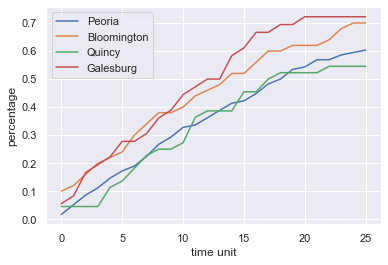

In [89]:
run_simulation(1, parameters_to_fit)
get_change_simulated(0, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(1, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(2, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(3, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])

# **train Quincy, get parameters, predicte other clusters**

training model ...: 100%|██████████| 50/50 [00:00<00:00, 939.00it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1360.35it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1201.92it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1395.56it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1675.50it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1784.13it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1724.96it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1805.26it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1754.40it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1778.91it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1786.47it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1751.55it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1737.85it/s]


None
None
None
None
None
None
None



training model ...: 100%|██████████| 50/50 [00:00<00:00, 1725.70it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1754.76it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1721.64it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1699.59it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None
None
None


simulation step : 100%|██████████| 25/25 [00:00<00:00, 27.11it/s]


None
cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.051724
2           2    0.086207
3           3    0.094828
4           4    0.103448
5           5    0.146552
6           6    0.146552
7           7    0.172414
8           8    0.206897
9           9    0.258621
10         10    0.293103
11         11    0.327586
12         12    0.336207
13         13    0.379310
14         14    0.387931
15         15    0.396552
16         16    0.422414
17         17    0.439655
18         18    0.465517
19         19    0.465517
20         20    0.482759
21         21    0.500000
22         22    0.500000
23         23    0.517241
24         24    0.551724

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.16
2           2        0.18
3           3        0.18
4           4        0.18
5           5        0.20
6           6        0.26
7           7        0.30
8           8        0.30
9           9        0.30
10        

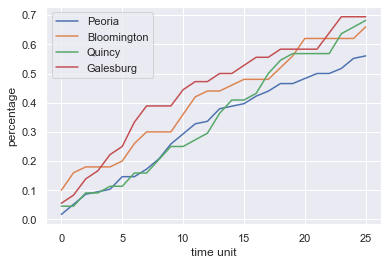

In [90]:
run_simulation(2, parameters_to_fit)
get_change_simulated(0, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(1, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(2, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(3, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])

# **train Galesburg, get parameters, predicte other clusters**

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1039.47it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1621.95it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1488.41it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1697.38it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1840.14it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1925.88it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 2081.35it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 2055.25it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 2050.02it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 2035.50it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 2044.47it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 2077.01it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 2095.98it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1992.58it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 1937.07it/s]

training model ...:   0%|          | 0/50 [00:00<?, ?it/s]

None
None
None
None
None
None
None


training model ...: 100%|██████████| 50/50 [00:00<00:00, 1911.11it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 2035.93it/s]

training model ...: 100%|██████████| 50/50 [00:00<00:00, 2021.02it/s]

simulation step : 100%|██████████| 25/25 [00:00<00:00, 31.07it/s]


None
None
None
None
None
cluster  0
    time unit  percentage
0           0    0.017241
1           1    0.068966
2           2    0.103448
3           3    0.137931
4           4    0.163793
5           5    0.206897
6           6    0.215517
7           7    0.232759
8           8    0.241379
9           9    0.258621
10         10    0.301724
11         11    0.327586
12         12    0.327586
13         13    0.353448
14         14    0.362069
15         15    0.370690
16         16    0.396552
17         17    0.422414
18         18    0.439655
19         19    0.474138
20         20    0.482759
21         21    0.491379
22         22    0.500000
23         23    0.534483
24         24    0.534483

cluster  1
    time unit  percentage
0           0        0.10
1           1        0.12
2           2        0.18
3           3        0.28
4           4        0.30
5           5        0.34
6           6        0.34
7           7        0.40
8           8        0.46
9           9   

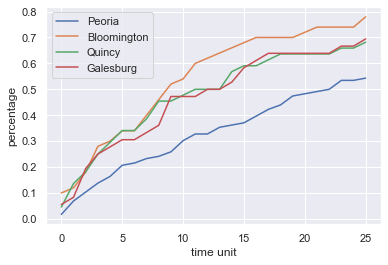

In [91]:
run_simulation(3, parameters_to_fit)
get_change_simulated(0, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(1, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(2, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])
get_change_simulated(3, parameters_to_fit[0], parameters_to_fit[1], parameters_to_fit[2], parameters_to_fit[3])